In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data/credit_score.csv')

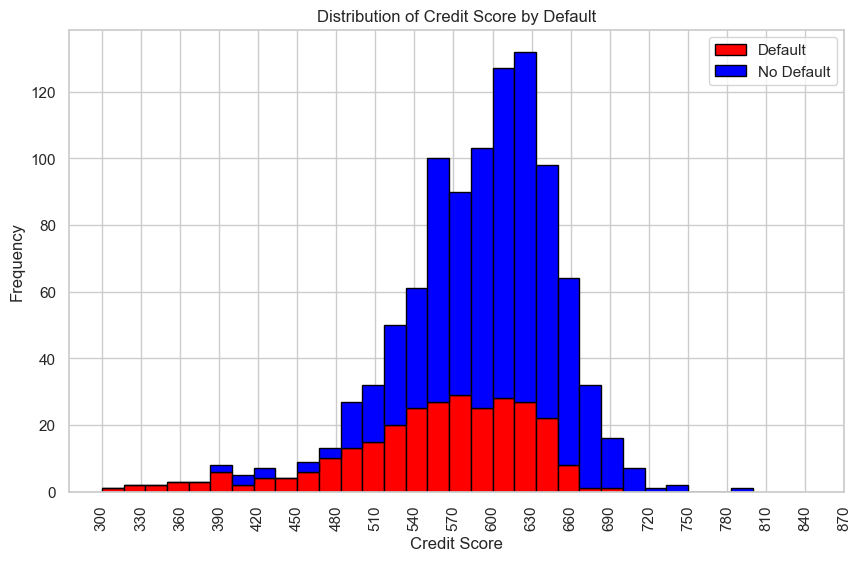

In [55]:
# Distribution of credit_score

df1 = data[data['DEFAULT'] == 1]
df2 = data[data['DEFAULT'] == 0]

plt.figure(figsize=(10, 6))

plt.hist([df1['CREDIT_SCORE'], df2['CREDIT_SCORE']], bins=30, stacked=True, color=['red', 'blue'], edgecolor='black',
         label=['Default', 'No Default'])

plt.title('Distribution of Credit Score by Default')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')

plt.legend()

plt.xticks(np.arange(300, 900, 30), rotation=90)

plt.show()


It seems to me that a division into 4 classes is ok:
very high credit score - 

In [22]:
def find_default_percentage(lower_bound):
    df = data[data['CREDIT_SCORE'] >= lower_bound]
    default_percentage = df['DEFAULT'].mean()
    return default_percentage*100

In [28]:
import plotly.graph_objs as go
import numpy as np

def get_graph():
    default_percentage = []

    i = 300
    while i < 800:
        default_percentage.append(find_default_percentage(i))
        i += 1

    x_values = np.arange(300, 800, 1)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x_values, y=default_percentage, mode='lines', name='Percent of Default'))
    fig.update_layout(
        title='Percent of Default for people with Credit Score >= x',
        xaxis=dict(title='x (Credit Score)'),
        yaxis=dict(title='Percent of Default'),
        hovermode='closest'
    )
    fig.show()

get_graph()

